**1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:** 
а) зависимость цены на недвижимость в конкретном регионе от времени,
ценными для интерпретации м.б.: сезонность цен аренды загородной недвижимости или изменения цен на недвижимость (аренды и покупки) из года в год

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
скорость во время одного полета - наверное на поиск аномалий в случае обнаружения поломки по результатам полета, хотя вряд ли этот показатель как единичный хоть как-то можно интерпретировать
скорость полета в разные дни - возможно и будут закономерности и зависимости - например от времени суток или от сезонов - движение воздушных масс. Особенно в совокупности с избранием различных воздушных коридоров. 

в) количество отказов компьютера,
формально - можно, наверное, выстроить ряд. Правда, в реальности не представляю, что это за компьютер такой, который при этом сохранит работоспособность и  какая ценность.

г) число обращений в поликлинику по району,
сезонные показатели, в течение дня. Можно, одновременно, с признаками вида обращений. Например, как самое тривиальное - для планирования работы регистратуры и уборки помещений.

д) координаты автобуса при движении по маршруту,
именно координаты - вряд ли можно как-то интерпретировать. мне в голову ничего не приходит Разве что каждый раз преобразовывать в пройденное расстояние от начальной точки. Возник вопрос, что это за вид данных - координаты. Это ведь числовые интервальные данные, как температура, или как?

е) координаты фигуры нарушителя в файле видеофиксации охранной системы - тут, честно говоря, не поняла, что имеется ввиду под координатами. Координаты относительно чего? На экране есть координаты?


**2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


## Данные для анализа

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv
Прочитаем ежеденевно обновляемые данные из ссылки и загрузим себе.

"D:\AI\Machine learning\novel-corona-virus-2019-dataset\covid_19_data.csv"

In [2]:
covid = pd.read_csv('D:/AI/Machine learning/novel-corona-virus-2019-dataset/covid_19_data.csv')


In [3]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13204,13205,04/08/2020,Wyoming,US,2020-04-08 22:59:00,221.0,0.0,0.0
13205,13206,04/08/2020,Xinjiang,Mainland China,2020-04-08 22:59:00,76.0,3.0,73.0
13206,13207,04/08/2020,Yukon,Canada,2020-04-08 22:59:00,7.0,0.0,0.0
13207,13208,04/08/2020,Yunnan,Mainland China,2020-04-08 22:59:00,184.0,2.0,173.0
13208,13209,04/08/2020,Zhejiang,Mainland China,2020-04-08 22:59:00,1266.0,1.0,1232.0


Making a dataframe copy and working with it only
Выносим дату отдельным столбцом

In [4]:
covid_19 = covid.copy()
covid_19['Date']= pd.to_datetime(covid['ObservationDate']).dt.date

**Extracting and saving data on US**

In [5]:
covid_usa = covid_19.loc[covid_19['Country/Region']=='US', :]

In [6]:
covid_usa.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
69,70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0,2020-01-23
117,118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0,2020-01-24
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0,2020-01-24
158,159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0,2020-01-25


In [7]:
#checking date repeats; finding number of dates
if len(covid_usa['Date'].value_counts())==covid_usa['Date'].nunique():
    print(covid_usa['Date'].nunique())

78


In [8]:
covid_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2614 entries, 31 to 13204
Data columns (total 9 columns):
SNo                2614 non-null int64
ObservationDate    2614 non-null object
Province/State     2614 non-null object
Country/Region     2614 non-null object
Last Update        2614 non-null object
Confirmed          2614 non-null float64
Deaths             2614 non-null float64
Recovered          2614 non-null float64
Date               2614 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 204.2+ KB


In [9]:
covid_usa.describe()

,SNo,Confirmed,Deaths,Recovered
count,2614.000000,2614.000000,2614.000000,2614.000000
mean,6742.770849,1399.350803,35.271232,54.949120
std,3525.991335,7737.862146,248.135273,930.277204
min,32.000000,0.000000,0.000000,0.000000
25%,3965.250000,2.000000,0.000000,0.000000
50%,6323.500000,29.000000,0.000000,0.000000
75%,9699.750000,399.750000,6.000000,0.000000
max,13205.000000,151061.000000,6268.000000,23559.000000


Interesting max numbers
**Checking high numbers**

In [10]:
covid_usa.loc[covid_usa['Confirmed']>100000, :]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
11559,11560,04/03/2020,New York,US,2020-04-03 22:52:45,102987.0,2935.0,0.0,2020-04-03
11875,11876,04/04/2020,New York,US,2020-04-04 23:41:02,113833.0,3565.0,0.0,2020-04-04
12193,12194,04/05/2020,New York,US,2020-04-05 23:13:44,123160.0,4159.0,0.0,2020-04-05
12513,12514,04/06/2020,New York,US,4/6/20 9:37,131815.0,4698.0,0.0,2020-04-06
12833,12834,04/07/2020,New York,US,2020-04-07 23:11:31,139875.0,5489.0,0.0,2020-04-07
13153,13154,04/08/2020,New York,US,2020-04-08 22:59:00,151061.0,6268.0,0.0,2020-04-08


In [11]:
covid_usa.loc[(covid_usa['Confirmed']>30000) & (covid_usa['Confirmed']<100001), :]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
8759,8760,03/25/2020,New York,US,2020-03-25 23:37:49,30841.0,285.0,0.0,2020-03-25
9063,9064,03/26/2020,New York,US,2020-03-26 23:53:24,37877.0,385.0,0.0,2020-03-26
9370,9371,03/27/2020,New York,US,2020-03-27 23:27:48,44876.0,527.0,0.0,2020-03-27
9680,9681,03/28/2020,New York,US,2020-03-28 23:11:06,52410.0,728.0,0.0,2020-03-28
9991,9992,03/29/2020,New York,US,3/8/20 5:31,59648.0,965.0,0.0,2020-03-29
10303,10304,03/30/2020,New York,US,3/8/20 5:31,66663.0,1218.0,0.0,2020-03-30
10616,10617,03/31/2020,New York,US,2020-03-31 23:49:27,75833.0,1550.0,0.0,2020-03-31
10929,10930,04/01/2020,New York,US,2020-04-01 22:04:58,83948.0,1941.0,0.0,2020-04-01
11244,11245,04/02/2020,New York,US,2020-04-02 23:32:01,92506.0,2373.0,0.0,2020-04-02
11872,11873,04/04/2020,New Jersey,US,2020-04-04 23:41:02,34124.0,846.0,0.0,2020-04-04


In [12]:
covid_usa.loc[covid_usa['Deaths']>1000, :]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
10303,10304,03/30/2020,New York,US,3/8/20 5:31,66663.0,1218.0,0.0,2020-03-30
10616,10617,03/31/2020,New York,US,2020-03-31 23:49:27,75833.0,1550.0,0.0,2020-03-31
10929,10930,04/01/2020,New York,US,2020-04-01 22:04:58,83948.0,1941.0,0.0,2020-04-01
11244,11245,04/02/2020,New York,US,2020-04-02 23:32:01,92506.0,2373.0,0.0,2020-04-02
11559,11560,04/03/2020,New York,US,2020-04-03 22:52:45,102987.0,2935.0,0.0,2020-04-03
11875,11876,04/04/2020,New York,US,2020-04-04 23:41:02,113833.0,3565.0,0.0,2020-04-04
12193,12194,04/05/2020,New York,US,2020-04-05 23:13:44,123160.0,4159.0,0.0,2020-04-05
12510,12511,04/06/2020,New Jersey,US,4/6/20 9:37,41090.0,1003.0,0.0,2020-04-06
12513,12514,04/06/2020,New York,US,4/6/20 9:37,131815.0,4698.0,0.0,2020-04-06
12830,12831,04/07/2020,New Jersey,US,2020-04-07 23:11:31,44416.0,1232.0,0.0,2020-04-07


In [13]:
covid_usa['Province/State'].value_counts()

Washington                 40
Los Angeles, CA            38
Illinois                   37
Arizona                    36
California                 36
                           ..
Queens County, NY           1
Lackland, TX                1
Travis, CA                  1
Cherokee County, GA         1
Unassigned Location, VT     1
Name: Province/State, Length: 199, dtype: int64

** working with data grouped by date through all the states **

In [14]:
covid_by_date = covid_usa.groupby(['Date'])['Confirmed','Deaths','Recovered'].sum()
covid_by_date

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,1.0,0.0,0.0
2020-01-23,1.0,0.0,0.0
2020-01-24,2.0,0.0,0.0
2020-01-25,2.0,0.0,0.0
2020-01-26,5.0,0.0,0.0
...,...,...,...
2020-04-04,308850.0,8407.0,14652.0
2020-04-05,337072.0,9619.0,17448.0
2020-04-06,366667.0,10783.0,19581.0


C:\Python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


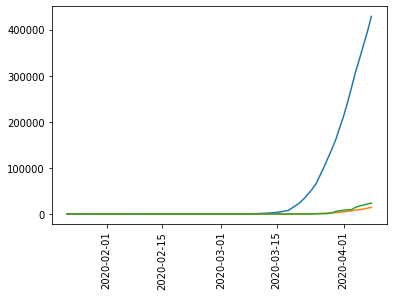

In [15]:
plt.plot(covid_by_date['Confirmed'], label='Confirmed')
plt.plot(covid_by_date['Deaths'], label='Deaths')
plt.plot(covid_by_date['Recovered'], label='Recovered')
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)
plt.show()

before 15th of March

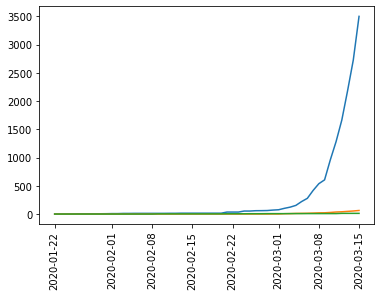

In [16]:
splitdate = pd.to_datetime('2020-03-15').date()
plt.plot((covid_by_date['Confirmed'].loc[:splitdate]), label='Confirmed')
plt.plot((covid_by_date['Deaths'].loc[:splitdate]), label='Deaths')
plt.plot((covid_by_date['Recovered'].loc[:splitdate]), label='Recovered')
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)
plt.show()

from 100 confirmed cases to 100

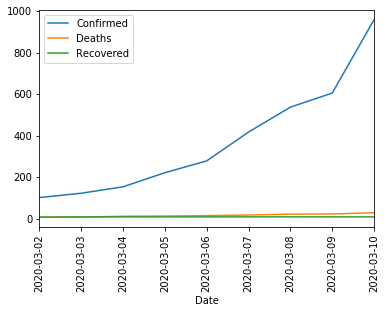

In [17]:
covid_by_date.loc[((covid_by_date['Confirmed'] > 100)& (covid_by_date['Confirmed'] < 1000)), :].plot()
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)

plt.show()

Посмотрим на них в цифрах

In [18]:
cases_100_1000 = covid_by_date.loc[((covid_by_date['Confirmed'] > 100)& (covid_by_date['Confirmed'] < 1000)), :]
cases_100_1000

,Confirmed,Deaths,Recovered
Date,,,
2020-03-02,101.0,6.0,7.0
2020-03-03,122.0,7.0,8.0
2020-03-04,153.0,11.0,8.0
2020-03-05,221.0,12.0,8.0
2020-03-06,278.0,14.0,8.0
2020-03-07,417.0,17.0,8.0
2020-03-08,537.0,21.0,8.0
2020-03-09,605.0,22.0,8.0
2020-03-10,959.0,28.0,8.0


Сделаем первые разности (производную)

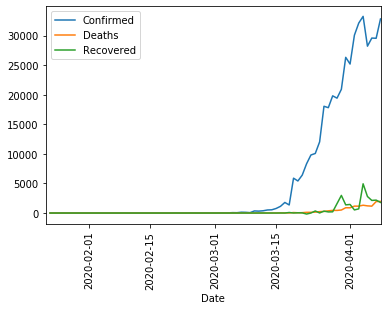

In [19]:
covid_by_date.diff(1).plot()
plt.xticks(label = covid_by_date.index.get_level_values('Date'), rotation=90)

plt.show()

Опять большой пик - нужен дополнительный анализ

Посмотрим только на выздоровление (так оптимистичней:))

Странный ход данных сохранился - будем разбираться, что происходит


## Построим признаки

1) Первая разность (производная ряда) - разница с(t)-c(t-1) по всем t 

In [20]:
X1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Mainland China', ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0

NameError: name 'COVID' is not defined

2) Сами значения элементов ряда по времени

In [ ]:
X2 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Mainland China', ['Confirmed','Deaths','Recovered']].values 

In [ ]:
X1.shape

In [ ]:
X2.shape

3) Добавим признаков по календарю
   

In [ ]:
X3 = COVID.iloc[COVID.index.get_level_values( 'Country/Region')=='Mainland China'].index.get_level_values( 'Data')

In [ ]:
X3

3.1) - день недели по счету

3.2) - день от начала статистики в текущей таблице (для Китая - 1-й день карантина(возможно), для других стран следует посмотреть на первый не 0-й экземпляр по 'Confirmed') - строим как "текущий день года" - "первый день от начала отсчета данных по номеру в году"

In [ ]:
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear

In [ ]:
X3_2

Собирем все в кучу

In [ ]:
XX = np.concatenate([X1,X2], axis= 1)

In [ ]:
XX = np.concatenate([XX,np.array(X3_1).reshape((75,1))], axis= 1)

In [ ]:
XX = np.concatenate([XX,np.array(X3_2).reshape((75,1))], axis= 1)

In [ ]:
XX.shape

Таблица признаков для Китая

In [ ]:
COVID_Data = pd.DataFrame(data= XX, index= X3)

In [ ]:
COVID_Data.head()

Сделаем данные для модели:

необходимо определить как далеко будем смотреть назад по ряду от текущего дня - это параметр р - глубина истории

необходимо определить как далеко будем смотреть вперед (предсказывать) - это горизонт прогноза h

In [ ]:
p = 10 # 10 дней назад по истории
h=1    # 1 день вперед предсказываем

Строим выходную часть данных:
 
 предсказываем значения заболеваемости (т.е. признак COVID_Dat.iloc[:,3])
 
 сдвигаем точку предсказания на длину истории р (т.к. не можем предсказывать имея меньше чем р данных для анализа) и ставим первой предсказываемой точкой точку p+h , h - горизонт предсказания

In [ ]:
y = COVID_Data.iloc[h+p:,3]
y

Строим данные для входной части модели:

наши р дней истории по всем признакам  начиная от 0-го дня используем блоками  XX[i:i+p,:] для i = 0,64

последний предсказываемый день будет 75-й (5.04.2020), т.е. данные для предсказания кончаются в 74-й день (4.04.2020)

векторизируем весь блок данных истории в вектор длины 8*р и дописываем в примеры для обучения  X

In [ ]:
X =[]
for i in range(len(y)):
    xx = XX[i:i+p,:]
    X.append(xx.reshape(8*p))

Приводим все к одному виду для обработки в модели

In [ ]:
X = np.array(X).reshape((75-p-h,8*p))
y=np.array(y).reshape((75-p-h,1))

In [ ]:
X.shape

In [ ]:
y.shape

Можно строить модель

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

N=-10
x_train,y_train,x_test,y_test=X[:N,:],y[:N,:],X[N:,:],y[N:,:]
# пока строим одну
model_lb = LinearRegression()

In [ ]:
model_lb.fit(x_train,y_train)

In [ ]:
y_pred = model_lb.predict(x_test)
y_pred_t = model_lb.predict(x_train)

In [ ]:
error_ =np.mean(np.abs(y_pred-y_test))
print(error_)

In [ ]:
plt.plot(y_pred_t, label='predict train')
plt.plot(y_train, label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()

In [ ]:
plt.plot(y_pred, label='predict')
plt.plot(y_test, label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()

Вообще получилось хорошо :) - довольно точно

In [ ]:
error_p =np.mean(np.abs(y_pred-y_test)/y_test)*100

print('error in MAPE :', error_p, '%')